In [1]:
from qiskit import *
from qiskit.visualization import plot_histogram
from qiskit.circuit.library import PhaseOracle
from qiskit_aer import AerSimulator
from qiskit_algorithms import Grover, AmplificationProblem
#from qiskit.primitives import Sampler
from qiskit_aer.primitives import Sampler
%matplotlib inline

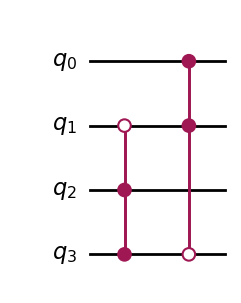

In [55]:
oracle = PhaseOracle('((James & Lars) | (Kirk & Rob)) & ~(Lars & Rob)')
oracle.draw(output='mpl')
problem = AmplificationProblem(oracle=oracle, is_good_state=oracle.evaluate_bitstring)
grover = Grover(sampler=Sampler())
result = grover.amplify(problem)

In [3]:
print(result.circuit_results[0])

{'1101': 0.2568359375, '1100': 0.23828125, '0011': 0.267578125, '0111': 0.2373046875}


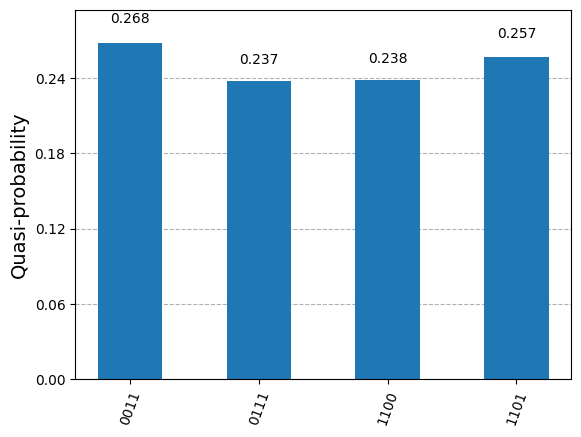

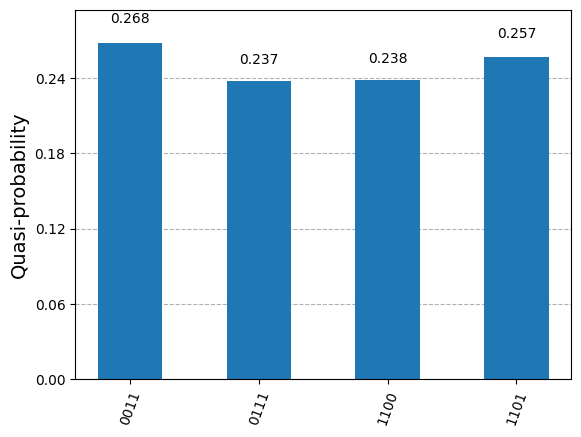

In [4]:
plot_histogram(result.circuit_results)

In [56]:
# James - Lars - Kirk - Rob
# James - Lars
# James - Lars - Kirk
# Kirk - Rob
# James - Kirk - Rob

In [42]:
from qiskit_ibm_runtime import QiskitRuntimeService, SamplerV2 as Sampler1
from qiskit.circuit.library import GroverOperator
oracle = PhaseOracle('((James & Lars) | (Kirk & Rob)) & ~(Lars & Rob)')
grober_op = GroverOperator(oracle=oracle)
grober_op.measure_all()

In [43]:
service = QiskitRuntimeService(channel="ibm_quantum")

In [44]:
quantum_computer = service.backend("ibm_kyiv")

In [45]:
from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager

In [46]:
pm = generate_preset_pass_manager(backend=quantum_computer, optimization_level=1)

In [47]:
isa_qc = pm.run(grober_op)

In [48]:
sampler = Sampler1(quantum_computer)

In [49]:
job = sampler.run([isa_qc])

In [50]:
result = job.result()

In [51]:
print(result)

PrimitiveResult([SamplerPubResult(data=DataBin(meas=BitArray(<shape=(), num_shots=4096, num_bits=4>)), metadata={'circuit_metadata': {}})], metadata={'execution': {'execution_spans': ExecutionSpans([SliceSpan(<start='2025-02-08 03:22:02', stop='2025-02-08 03:22:40', size=4096>)])}, 'version': 2})


In [52]:
print(result[0].data.meas)

BitArray(<shape=(), num_shots=4096, num_bits=4>)


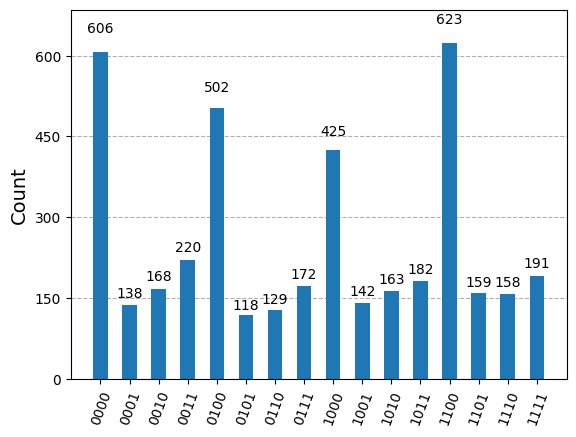

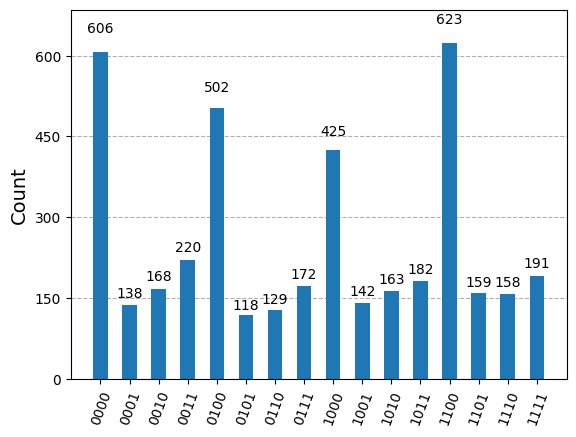

In [53]:
plot_histogram(result[0].data.meas.get_counts())